In [150]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind, ranksums
from scipy.stats import kruskal
from sklearn.preprocessing import OrdinalEncoder
from path import Path

import os
import json

with open('data/paths.json','r') as f:
    paths = json.load(f)

data_path = paths["data_path"]

In [91]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_19681/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [92]:
# importing file inside pandas dataframe

dd = pd.read_excel(os.path.join(data_path,'FL_PND30Striatum_summary_nomacro.xls'), index_col=0)

In [93]:
# Let's show the lines from 6 to 9

dd.iloc[6:10,:]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
Total Metabolite extraction volume (µl) 700,,,,,,,,,,,,,,,,,,,,,
5-aminolevulinic_acid,0.040117,0.027517,0.040215,0.042181,0.023696,0.022276,0.010290,0.021757,0.02878,0.029748,...,8020.066590,8345.355667,7909.55774,7713.997525,7431.790172,7718.215178,9099.493111,18.56446,0.88503,0.365492
5-hydroxy_Try,0.009607,0.009533,0.008175,0.008740,0.00695,0.005842,0.004812,0.004923,0.008052,0.007801,...,1667.826385,1692.775955,1264.289474,1177.882854,1070.236259,1041.224055,1537.495148,21.09654,0.568761,0.000863
Acetyl-Ornithine,0.000931,0.000995,0.001052,0.001194,0.002129,0.001920,0.001869,0.002166,0.000244,0.000555,...,647.296633,719.570750,703.455956,501.572756,721.432599,712.643823,699.263655,15.665408,1.893652,0.000005
Ac-Taurine,0.000931,0.000996,0.001052,0.001195,0.002129,0.001921,0.001870,0.002167,0.000244,0.000555,...,647.619464,719.839670,704.167341,501.572756,721.826042,713.087411,699.593004,15.675408,1.893754,0.000005


In [94]:
# Let's copy the dataframe fromthe line 6 to the line 59 to another variable df, and let's drop the columns 36,37,50,51,52,53.
# these are the columns of the excel file where there are the synthesis of data

df = dd.iloc[6:60].copy()
df.drop(df.columns[[36,37,50,51,52,53]],axis=1,inplace=True)

In [95]:
# Let's remove the index name (the column name of the index column: 'Total Metabolite extraction volume (µl) 700')

df.index.name = None

In [96]:
# Let's see the shape of the dataframe

df.shape

(54, 48)

In [97]:
# We need the metabolites on the columns (as if they were features) and subjects on the rows. We transpose the matrix

df_transpose = df.T
df_transpose.head()

,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,Asp,Aspartyl-b-phosphate-98,Aspartyl-b-phosphate-98a,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
Unnamed: 1,0.040117,0.009607,0.000931,0.000931,0.882695,0.117189,0.068456,1.161645,0.003033,0.003031,...,0.489826,0.469548,0.722157,0.039045,0.001257,5.238529,0.255136,0.011025,0.09062,0.058712
Unnamed: 2,0.027517,0.009533,0.000995,0.000996,0.913878,0.125095,0.070042,1.250514,0.003379,0.003375,...,0.502703,0.507347,0.716468,0.037071,0.001387,5.296312,0.238376,0.010763,0.092762,0.061582
Unnamed: 3,0.040215,0.008175,0.001052,0.001052,0.927239,0.12025,0.068509,1.247301,0.003416,0.003414,...,0.525931,0.500497,0.717906,0.037596,0.001461,5.307043,0.256568,0.010275,0.095197,0.062326
Unnamed: 4,0.042181,0.00874,0.001194,0.001195,0.954527,0.122853,0.071579,1.308719,0.00309,0.003086,...,0.497989,0.511261,0.7188,0.035116,0.001332,5.496932,0.234214,0.011029,0.097331,0.065367
Unnamed: 5,0.023696,0.00695,0.002129,0.002129,0.964982,0.098883,0.049718,0.845056,0.000572,0.000571,...,0.374121,0.275494,0.583096,0.041244,0.000512,3.359854,0.250205,0.013925,0.042076,0.086673
Unnamed: 6,0.022276,0.005842,0.00192,0.001921,0.967541,0.097456,0.05144,0.883454,0.000584,0.000583,...,0.385413,0.280611,0.592308,0.04111,0.000409,3.327381,0.242234,0.013472,0.044596,0.085133
Unnamed: 7,0.01029,0.004812,0.001869,0.00187,0.924348,0.086817,0.04447,0.81223,0.000574,0.000573,...,0.36636,0.249705,0.597101,0.027497,0.00033,3.314669,0.238572,0.012449,0.039459,0.084606
Unnamed: 8,0.021757,0.004923,0.002166,0.002167,0.94084,0.092905,0.047576,0.865807,0.000496,0.000495,...,0.385002,0.272508,0.581002,0.033019,0.000475,3.277351,0.235231,0.013142,0.041947,0.08251
Unnamed: 9,0.02878,0.008052,0.000244,0.000244,0.597188,0.053238,0.031753,1.131119,0.003021,0.003015,...,0.211189,0.526464,0.344967,0.024724,0.001414,2.638938,0.121197,0.004281,0.047242,0.031283
Unnamed: 10,0.029748,0.007801,0.000555,0.000555,0.553023,0.062179,0.031816,1.114583,0.003095,0.003092,...,0.206886,0.518615,0.349552,0.02284,0.00153,2.641977,0.117447,0.004271,0.045437,0.031612


In [98]:
# now we prepare the name of the subjects. Remember that we have 4 acquisition for metabolite for each subject. The metabolites are in the columns now, sow for each column we have 4 values for each subject

subjects = ['#4 PND 3D Striatum C20Female F2S Control','#5 PND 3D Striatum C21FemaleF2S Control','#6 PND 3D Striatum C11FemaleF2S Control','#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin','#11 PND 3D Striatum T33FemaleF1S Deltamethrin','#12 PND 3D Striatum T34FemaleF1S Deltamethrin']
subjects_column = list(itertools.chain(*zip(subjects,subjects,subjects,subjects)))*2
subjects_column

['#4 PND 3D Striatum C20Female F2S Control',
 '#4 PND 3D Striatum C20Female F2S Control',
 '#4 PND 3D Striatum C20Female F2S Control',
 '#4 PND 3D Striatum C20Female F2S Control',
 '#5 PND 3D Striatum C21FemaleF2S Control',
 '#5 PND 3D Striatum C21FemaleF2S Control',
 '#5 PND 3D Striatum C21FemaleF2S Control',
 '#5 PND 3D Striatum C21FemaleF2S Control',
 '#6 PND 3D Striatum C11FemaleF2S Control',
 '#6 PND 3D Striatum C11FemaleF2S Control',
 '#6 PND 3D Striatum C11FemaleF2S Control',
 '#6 PND 3D Striatum C11FemaleF2S Control',
 '#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin',
 '#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin',
 '#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin',
 '#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin',
 '#11 PND 3D Striatum T33FemaleF1S Deltamethrin',
 '#11 PND 3D Striatum T33FemaleF1S Deltamethrin',
 '#11 PND 3D Striatum T33FemaleF1S Deltamethrin',
 '#11 PND 3D Striatum T33FemaleF1S Deltamethrin',
 '#12 PND 3D Striatum T34FemaleF1S Deltamethrin',
 '#12 

In [99]:
# and we insert this as the first column of the dataframe

df_transpose.insert(0,'Subject',subjects_column,True)
df_transpose.head()

,Subject,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,Asp,Aspartyl-b-phosphate-98,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
Unnamed: 1,#4 PND 3D Striatum C20Female F2S Control,0.040117,0.009607,0.000931,0.000931,0.882695,0.117189,0.068456,1.161645,0.003033,...,0.489826,0.469548,0.722157,0.039045,0.001257,5.238529,0.255136,0.011025,0.09062,0.058712
Unnamed: 2,#4 PND 3D Striatum C20Female F2S Control,0.027517,0.009533,0.000995,0.000996,0.913878,0.125095,0.070042,1.250514,0.003379,...,0.502703,0.507347,0.716468,0.037071,0.001387,5.296312,0.238376,0.010763,0.092762,0.061582
Unnamed: 3,#4 PND 3D Striatum C20Female F2S Control,0.040215,0.008175,0.001052,0.001052,0.927239,0.12025,0.068509,1.247301,0.003416,...,0.525931,0.500497,0.717906,0.037596,0.001461,5.307043,0.256568,0.010275,0.095197,0.062326
Unnamed: 4,#4 PND 3D Striatum C20Female F2S Control,0.042181,0.00874,0.001194,0.001195,0.954527,0.122853,0.071579,1.308719,0.00309,...,0.497989,0.511261,0.7188,0.035116,0.001332,5.496932,0.234214,0.011029,0.097331,0.065367
Unnamed: 5,#5 PND 3D Striatum C21FemaleF2S Control,0.023696,0.00695,0.002129,0.002129,0.964982,0.098883,0.049718,0.845056,0.000572,...,0.374121,0.275494,0.583096,0.041244,0.000512,3.359854,0.250205,0.013925,0.042076,0.086673


In [100]:
# the file excel is divided in tw blocks; the measure with IS normnalization ,a nd the emasures without normalization.
# We prepare a column where we define which subject is related to which block

a = range(24)
first_block = ['Measured [metabolites/ IS] Ratio']*24
second_block = ['Concentration in sample [pmole/1mg protein]']*24
results_type_column = first_block + second_block
results_type_column

['Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Concentration in sample [pmole/1mg protein]',
 'Concentration in sample [pmole/1mg protein]',
 'Concentration 

In [101]:
# and we put this list in the second column of the dataframe

df_transpose.insert(1,'Measurements_types',results_type_column,True)
df_transpose.head()

,Subject,Measurements_types,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,Asp,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
Unnamed: 1,#4 PND 3D Striatum C20Female F2S Control,Measured [metabolites/ IS] Ratio,0.040117,0.009607,0.000931,0.000931,0.882695,0.117189,0.068456,1.161645,...,0.489826,0.469548,0.722157,0.039045,0.001257,5.238529,0.255136,0.011025,0.09062,0.058712
Unnamed: 2,#4 PND 3D Striatum C20Female F2S Control,Measured [metabolites/ IS] Ratio,0.027517,0.009533,0.000995,0.000996,0.913878,0.125095,0.070042,1.250514,...,0.502703,0.507347,0.716468,0.037071,0.001387,5.296312,0.238376,0.010763,0.092762,0.061582
Unnamed: 3,#4 PND 3D Striatum C20Female F2S Control,Measured [metabolites/ IS] Ratio,0.040215,0.008175,0.001052,0.001052,0.927239,0.12025,0.068509,1.247301,...,0.525931,0.500497,0.717906,0.037596,0.001461,5.307043,0.256568,0.010275,0.095197,0.062326
Unnamed: 4,#4 PND 3D Striatum C20Female F2S Control,Measured [metabolites/ IS] Ratio,0.042181,0.00874,0.001194,0.001195,0.954527,0.122853,0.071579,1.308719,...,0.497989,0.511261,0.7188,0.035116,0.001332,5.496932,0.234214,0.011029,0.097331,0.065367
Unnamed: 5,#5 PND 3D Striatum C21FemaleF2S Control,Measured [metabolites/ IS] Ratio,0.023696,0.00695,0.002129,0.002129,0.964982,0.098883,0.049718,0.845056,...,0.374121,0.275494,0.583096,0.041244,0.000512,3.359854,0.250205,0.013925,0.042076,0.086673


In [102]:
# Last thing we need to include in the dataframe is the block of control/deltametrhin.
# Let's remember that we have two block of measures (IS and not IS). For each block we have 3 subjects of control and 3 subjects of deltamethrin. Each subject has 4 measures for 
# metabolite; so we have 12 control, 12 deltametrin for the IS measures and 12 control and 12 deltamethrin for NON IS measures

control_treated = ['Control']*12 + ['Deltamethrin']*12 + ['Control']*12 + ['Deltamethrin']*12
control_treated

['Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin']

In [103]:
# We include this list of control/deltamethrin in the second column of the dataframe (and the column we included before is shifted tot he right)

df_transpose.insert(1,'Control/Treated',control_treated,True)
df_transpose.head()

,Subject,Control/Treated,Measurements_types,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
Unnamed: 1,#4 PND 3D Striatum C20Female F2S Control,Control,Measured [metabolites/ IS] Ratio,0.040117,0.009607,0.000931,0.000931,0.882695,0.117189,0.068456,...,0.489826,0.469548,0.722157,0.039045,0.001257,5.238529,0.255136,0.011025,0.09062,0.058712
Unnamed: 2,#4 PND 3D Striatum C20Female F2S Control,Control,Measured [metabolites/ IS] Ratio,0.027517,0.009533,0.000995,0.000996,0.913878,0.125095,0.070042,...,0.502703,0.507347,0.716468,0.037071,0.001387,5.296312,0.238376,0.010763,0.092762,0.061582
Unnamed: 3,#4 PND 3D Striatum C20Female F2S Control,Control,Measured [metabolites/ IS] Ratio,0.040215,0.008175,0.001052,0.001052,0.927239,0.12025,0.068509,...,0.525931,0.500497,0.717906,0.037596,0.001461,5.307043,0.256568,0.010275,0.095197,0.062326
Unnamed: 4,#4 PND 3D Striatum C20Female F2S Control,Control,Measured [metabolites/ IS] Ratio,0.042181,0.00874,0.001194,0.001195,0.954527,0.122853,0.071579,...,0.497989,0.511261,0.7188,0.035116,0.001332,5.496932,0.234214,0.011029,0.097331,0.065367
Unnamed: 5,#5 PND 3D Striatum C21FemaleF2S Control,Control,Measured [metabolites/ IS] Ratio,0.023696,0.00695,0.002129,0.002129,0.964982,0.098883,0.049718,...,0.374121,0.275494,0.583096,0.041244,0.000512,3.359854,0.250205,0.013925,0.042076,0.086673


In [104]:
# Since we haeve a dataframe we can set the indexes to understand better the structure until now

df_transpose.set_index(['Subject','Control/Treated','Measurements_types'], inplace=True)
df_transpose.head()

5-aminolevulinic_acid  \
Subject                                  Control/Treated Measurements_types                                       
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio              0.040117   
                                                         Measured [metabolites/ IS] Ratio              0.027517   
                                                         Measured [metabolites/ IS] Ratio              0.040215   
                                                         Measured [metabolites/ IS] Ratio              0.042181   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio              0.023696   

                                                                                          5-hydroxy_Try  \
Subject                                  Control/Treated Measurements_types                               
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio      0.009607   
                                                         Measured [metabolites/ IS] Ratio      0.009533   
                                                         Measured [metabolites/ IS] Ratio      0.008175   
                                                         Measured [metabolites/ IS] Ratio       0.00874   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio       0.00695   

                                                                                          Acetyl-Ornithine  \
Subject                                  Control/Treated Measurements_types                                  
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio         0.000931   
                                                         Measured [metabolites/ IS] Ratio         0.000995   
                                                         Measured [metabolites/ IS] Ratio         0.001052   
                                                         Measured [metabolites/ IS] Ratio         0.001194   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio         0.002129   

                                                                                          Ac-Taurine  \
Subject                                  Control/Treated Measurements_types                            
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio   0.000931   
                                                         Measured [metabolites/ IS] Ratio   0.000996   
                                                         Measured [metabolites/ IS] Ratio   0.001052   
                                                         Measured [metabolites/ IS] Ratio   0.001195   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio   0.002129   

                                                                                          Alpha-Alanine  \
Subject                                  Control/Treated Measurements_types                               
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio      0.882695   
                                                         Measured [metabolites/ IS] Ratio      0.913878   
                                                         Measured [metabolites/ IS] Ratio      0.927239   
                                                         Measured [metabolites/ IS] Ratio      0.954527   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio      0.964982   

                                                                                                Arg  \
Subject                                  Control/Treated Measurements_types                           
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites

In [105]:
# just to be sure we don't have strings inside the datafrmae we transform evrything to numeric

df_transpose = df_transpose[df_transpose.columns].apply(pd.to_numeric)

In [106]:
# We can now isoltare onlythe values realted to the measurement type with IS normalization

data_MIR = df_transpose[df_transpose.index.get_level_values('Measurements_types').isin(['Measured [metabolites/ IS] Ratio'])]
data_MIR.head()

5-aminolevulinic_acid  \
Subject                                  Control/Treated Measurements_types                                        
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio               0.040117   
                                                         Measured [metabolites/ IS] Ratio               0.027517   
                                                         Measured [metabolites/ IS] Ratio               0.040215   
                                                         Measured [metabolites/ IS] Ratio               0.042181   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio               0.023696   

                                                                                           5-hydroxy_Try  \
Subject                                  Control/Treated Measurements_types                                
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio       0.009607   
                                                         Measured [metabolites/ IS] Ratio       0.009533   
                                                         Measured [metabolites/ IS] Ratio       0.008175   
                                                         Measured [metabolites/ IS] Ratio       0.008740   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio       0.006950   

                                                                                           Acetyl-Ornithine  \
Subject                                  Control/Treated Measurements_types                                   
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio          0.000931   
                                                         Measured [metabolites/ IS] Ratio          0.000995   
                                                         Measured [metabolites/ IS] Ratio          0.001052   
                                                         Measured [metabolites/ IS] Ratio          0.001194   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio          0.002129   

                                                                                           Ac-Taurine  \
Subject                                  Control/Treated Measurements_types                             
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio    0.000931   
                                                         Measured [metabolites/ IS] Ratio    0.000996   
                                                         Measured [metabolites/ IS] Ratio    0.001052   
                                                         Measured [metabolites/ IS] Ratio    0.001195   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio    0.002129   

                                                                                           Alpha-Alanine  \
Subject                                  Control/Treated Measurements_types                                
#4 PND 3D Striatum C20Female F2S Control Control         Measured [metabolites/ IS] Ratio       0.882695   
                                                         Measured [metabolites/ IS] Ratio       0.913878   
                                                         Measured [metabolites/ IS] Ratio       0.927239   
                                                         Measured [metabolites/ IS] Ratio       0.954527   
#5 PND 3D Striatum C21FemaleF2S Control  Control         Measured [metabolites/ IS] Ratio       0.964982   

                                                                                                Arg  \
Subject                                  Control/Treated Measurements_types                           
#4 PND 3D Striatum C20Female F2S Control Con

In [107]:
# we make this command just to show what happends when we reset he indexes. Basicoally everything is written more than just once.
# We need this kind of way to save the CSV file

df_transpose_temp_no_index = data_MIR.reset_index()
df_transpose_temp_no_index.head()

,Subject,Control/Treated,Measurements_types,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
0,#4 PND 3D Striatum C20Female F2S Control,Control,Measured [metabolites/ IS] Ratio,0.040117,0.009607,0.000931,0.000931,0.882695,0.117189,0.068456,...,0.489826,0.469548,0.722157,0.039045,0.001257,5.238529,0.255136,0.011025,0.090620,0.058712
1,#4 PND 3D Striatum C20Female F2S Control,Control,Measured [metabolites/ IS] Ratio,0.027517,0.009533,0.000995,0.000996,0.913878,0.125095,0.070042,...,0.502703,0.507347,0.716468,0.037071,0.001387,5.296312,0.238376,0.010763,0.092762,0.061582
2,#4 PND 3D Striatum C20Female F2S Control,Control,Measured [metabolites/ IS] Ratio,0.040215,0.008175,0.001052,0.001052,0.927239,0.120250,0.068509,...,0.525931,0.500497,0.717906,0.037596,0.001461,5.307043,0.256568,0.010275,0.095197,0.062326
3,#4 PND 3D Striatum C20Female F2S Control,Control,Measured [metabolites/ IS] Ratio,0.042181,0.008740,0.001194,0.001195,0.954527,0.122853,0.071579,...,0.497989,0.511261,0.718800,0.035116,0.001332,5.496932,0.234214,0.011029,0.097331,0.065367
4,#5 PND 3D Striatum C21FemaleF2S Control,Control,Measured [metabolites/ IS] Ratio,0.023696,0.006950,0.002129,0.002129,0.964982,0.098883,0.049718,...,0.374121,0.275494,0.583096,0.041244,0.000512,3.359854,0.250205,0.013925,0.042076,0.086673


In [108]:
# So we use the rest_index command to make the dataframe like the exmaple above and save it to the CSV

df_to_export = data_MIR.reset_index()
df_to_export.to_csv(os.path.join(data_path,'FL_PND30Striatum_Females_MIR.csv'),index=False)

In [109]:
# we do this also for the other kind of measurement (without IS normalziation) block

data_CIS = df_transpose[df_transpose.index.get_level_values('Measurements_types').isin(['Concentration in sample [pmole/1mg protein]'])]
df_to_export = data_CIS.reset_index()
df_to_export.to_csv(os.path.join(data_path,'FL_PND30Striatum_Females_CIS.csv'),index=False)

## DESCRIPTIVE ANALYSIS

In [152]:
# let's start getting info of the genral descriptive statistics. In this case the statistics is for the CONTROL subjects only

data_MIR.loc[:,'Control',:].describe()

,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,Asp,Aspartyl-b-phosphate-98,Aspartyl-b-phosphate-98a,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.028358,0.007422,0.001179,0.001180,0.809760,0.092239,0.049515,1.071517,0.002249,0.002247,...,0.360954,0.430665,0.552496,0.031682,0.001064,3.764457,0.203039,0.009407,0.060947,0.058924
std,0.009082,0.001592,0.000685,0.000686,0.186201,0.026090,0.016784,0.174209,0.001261,0.001260,...,0.130279,0.120332,0.159439,0.008103,0.000477,1.197958,0.060677,0.004006,0.024558,0.023508
min,0.010290,0.004812,0.000244,0.000244,0.532760,0.053238,0.028784,0.812230,0.000496,0.000495,...,0.188012,0.249705,0.344967,0.017801,0.000330,2.529207,0.117447,0.003990,0.039459,0.027821
25%,0.023341,0.006673,0.000717,0.000717,0.587417,0.068214,0.031801,0.879043,0.000582,0.000580,...,0.210114,0.279332,0.353536,0.024323,0.000502,2.719459,0.124663,0.004278,0.043966,0.031530
50%,0.027608,0.007595,0.001023,0.001024,0.919113,0.095180,0.048647,1.122851,0.002956,0.002952,...,0.379561,0.503922,0.587702,0.034067,0.001295,3.321025,0.236803,0.010894,0.047129,0.061954
75%,0.032340,0.008316,0.001882,0.001883,0.944261,0.117954,0.068469,1.183059,0.003091,0.003088,...,0.491867,0.516258,0.716827,0.037958,0.001425,5.252975,0.244227,0.012622,0.091155,0.083034
max,0.042181,0.009607,0.002166,0.002167,0.967541,0.125095,0.071579,1.308719,0.003416,0.003414,...,0.525931,0.540456,0.722157,0.041244,0.001530,5.496932,0.256568,0.013925,0.097331,0.086673


In [111]:
# let's start getting info of the genral descriptive statistics. In this case the statistics is for the DELTAMETHRIN subjects only

data_MIR.loc[:,'Deltamethrin',:].describe()

,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,Asp,Aspartyl-b-phosphate-98,Aspartyl-b-phosphate-98a,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.044169,0.007456,0.003443,0.003445,1.140743,0.099101,0.068991,1.492802,0.003566,0.003562,...,0.683428,0.574326,0.824551,0.052513,0.000911,6.192180,0.362253,0.016424,0.086038,0.094175
std,0.001332,0.000913,0.000543,0.000544,0.094688,0.010221,0.005679,0.083905,0.000586,0.000585,...,0.146762,0.039592,0.077795,0.006691,0.000154,0.112728,0.055872,0.003399,0.021819,0.014759
min,0.041762,0.006091,0.002735,0.002736,1.054106,0.087313,0.059645,1.370272,0.002662,0.002660,...,0.545845,0.533524,0.746526,0.041124,0.000589,6.037993,0.298642,0.013316,0.058709,0.078252
25%,0.043359,0.006990,0.002912,0.002912,1.062798,0.089708,0.064770,1.406788,0.003223,0.003216,...,0.570618,0.547153,0.760067,0.048700,0.000819,6.105987,0.304137,0.014120,0.066315,0.083592
50%,0.044167,0.007324,0.003446,0.003447,1.104867,0.099263,0.069884,1.513709,0.003396,0.003394,...,0.612518,0.551502,0.792018,0.051545,0.000912,6.184603,0.355475,0.014469,0.081732,0.087329
75%,0.045133,0.007885,0.003839,0.003841,1.231097,0.103621,0.072703,1.551165,0.003786,0.003780,...,0.844903,0.619241,0.915501,0.057374,0.001027,6.267143,0.410193,0.020530,0.109776,0.108182
max,0.046271,0.008823,0.004220,0.004223,1.293989,0.116019,0.078945,1.606036,0.004793,0.004789,...,0.909091,0.637332,0.943124,0.062939,0.001112,6.392471,0.458842,0.021894,0.114994,0.116969


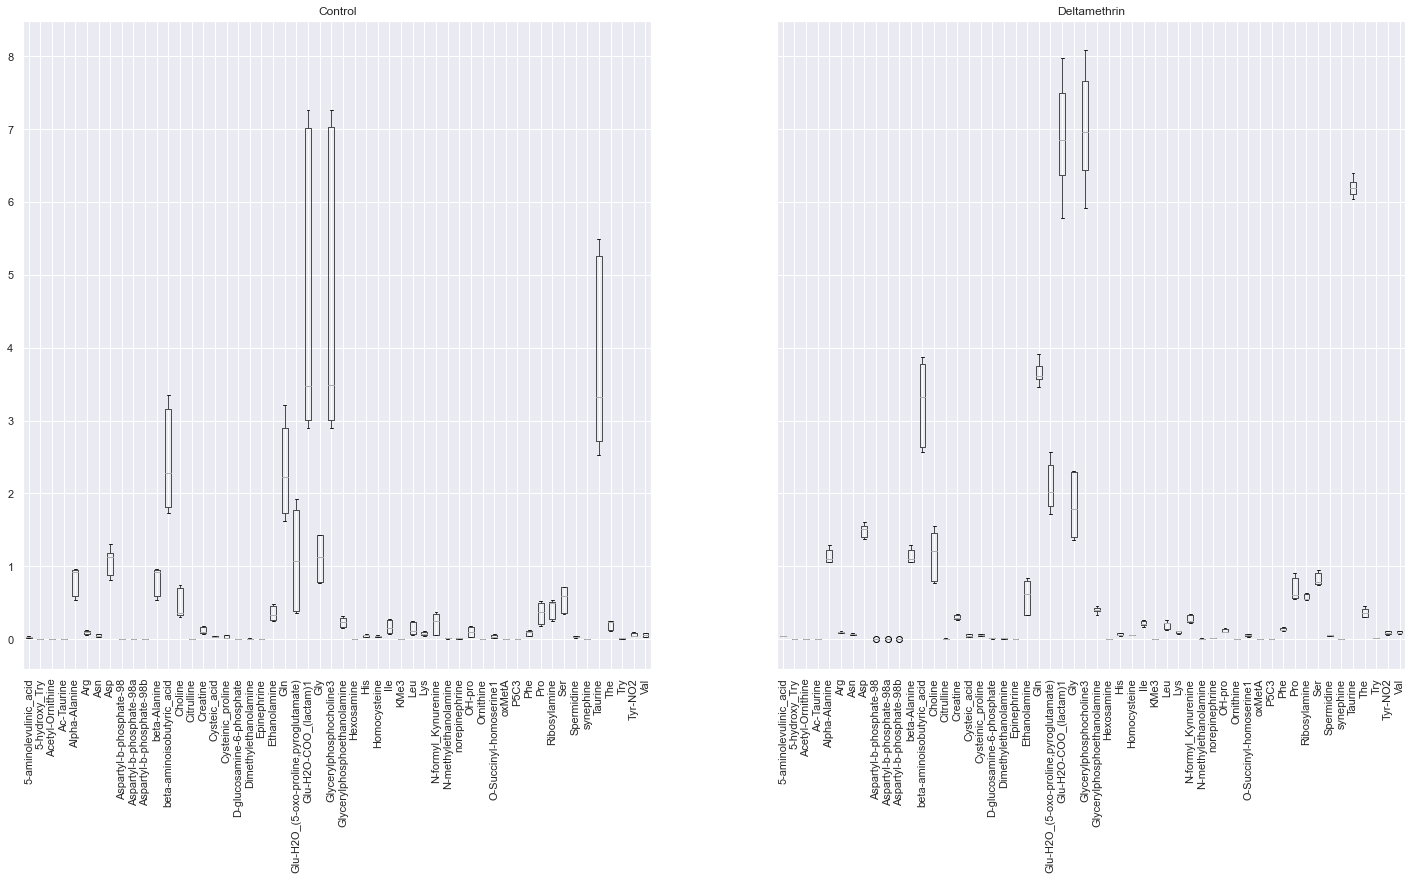

In [124]:
data_MIR.groupby('Control/Treated').boxplot(rot=90,figsize=(24,12))
plt.savefig(os.path.join(data_path,"distribuzione-F30.svg"),format="svg",facecolor="w")

In [125]:
list_columns = data_MIR.columns
list_columns

Index(['5-aminolevulinic_acid', '5-hydroxy_Try', 'Acetyl-Ornithine',
       'Ac-Taurine', 'Alpha-Alanine', 'Arg', 'Asn', 'Asp',
       'Aspartyl-b-phosphate-98', 'Aspartyl-b-phosphate-98a',
       'Aspartyl-b-phosphate-98b', 'beta-Alanine', 'beta-aminoisobutyric_acid',
       'Choline', 'Citrulline', 'Creatine', 'Cysteic_acid',
       'Cysteinic_proline', 'D-glucosamine-6-phosphate',
       'Dimethylethanolamine', 'Epinephrine', 'Ethanolamine', 'Gln',
       'Glu-H2O_(5-oxo-proline,pyroglutamate)', 'Glu-H2O-COO_(lactam)1', 'Gly',
       'Glycerylphosphocholine3', 'Glycerylphosphoethanolamine', 'Hexosamine',
       'His', 'Homocysteine', 'Ile', 'KMe3', 'Leu', 'Lys',
       'N-formyl_Kynurenine', 'N-methylethanolamine', 'norepinephrine',
       'OH-pro', 'Ornithine', 'O-Succinyl-homoserine1', 'oxMetA', 'P5C3',
       'Phe', 'Pro', 'Ribosylamine', 'Ser', 'Spermidine', 'synephine',
       'Taurine', 'The', 'Try', 'Tyr-NO2', 'Val'],
      dtype='object')

In [126]:
len(list_columns)

54

In [127]:
# we need to melt the datafrmae in the new variable

data_MIR_melt = pd.melt(data_MIR.reset_index(), id_vars='Control/Treated',value_vars=list_columns)
data_MIR_melt.head(30)

,Control/Treated,variable,value
0,Control,5-aminolevulinic_acid,0.040117
1,Control,5-aminolevulinic_acid,0.027517
2,Control,5-aminolevulinic_acid,0.040215
3,Control,5-aminolevulinic_acid,0.042181
4,Control,5-aminolevulinic_acid,0.023696
5,Control,5-aminolevulinic_acid,0.022276
6,Control,5-aminolevulinic_acid,0.010290
7,Control,5-aminolevulinic_acid,0.021757
8,Control,5-aminolevulinic_acid,0.028780
9,Control,5-aminolevulinic_acid,0.029748


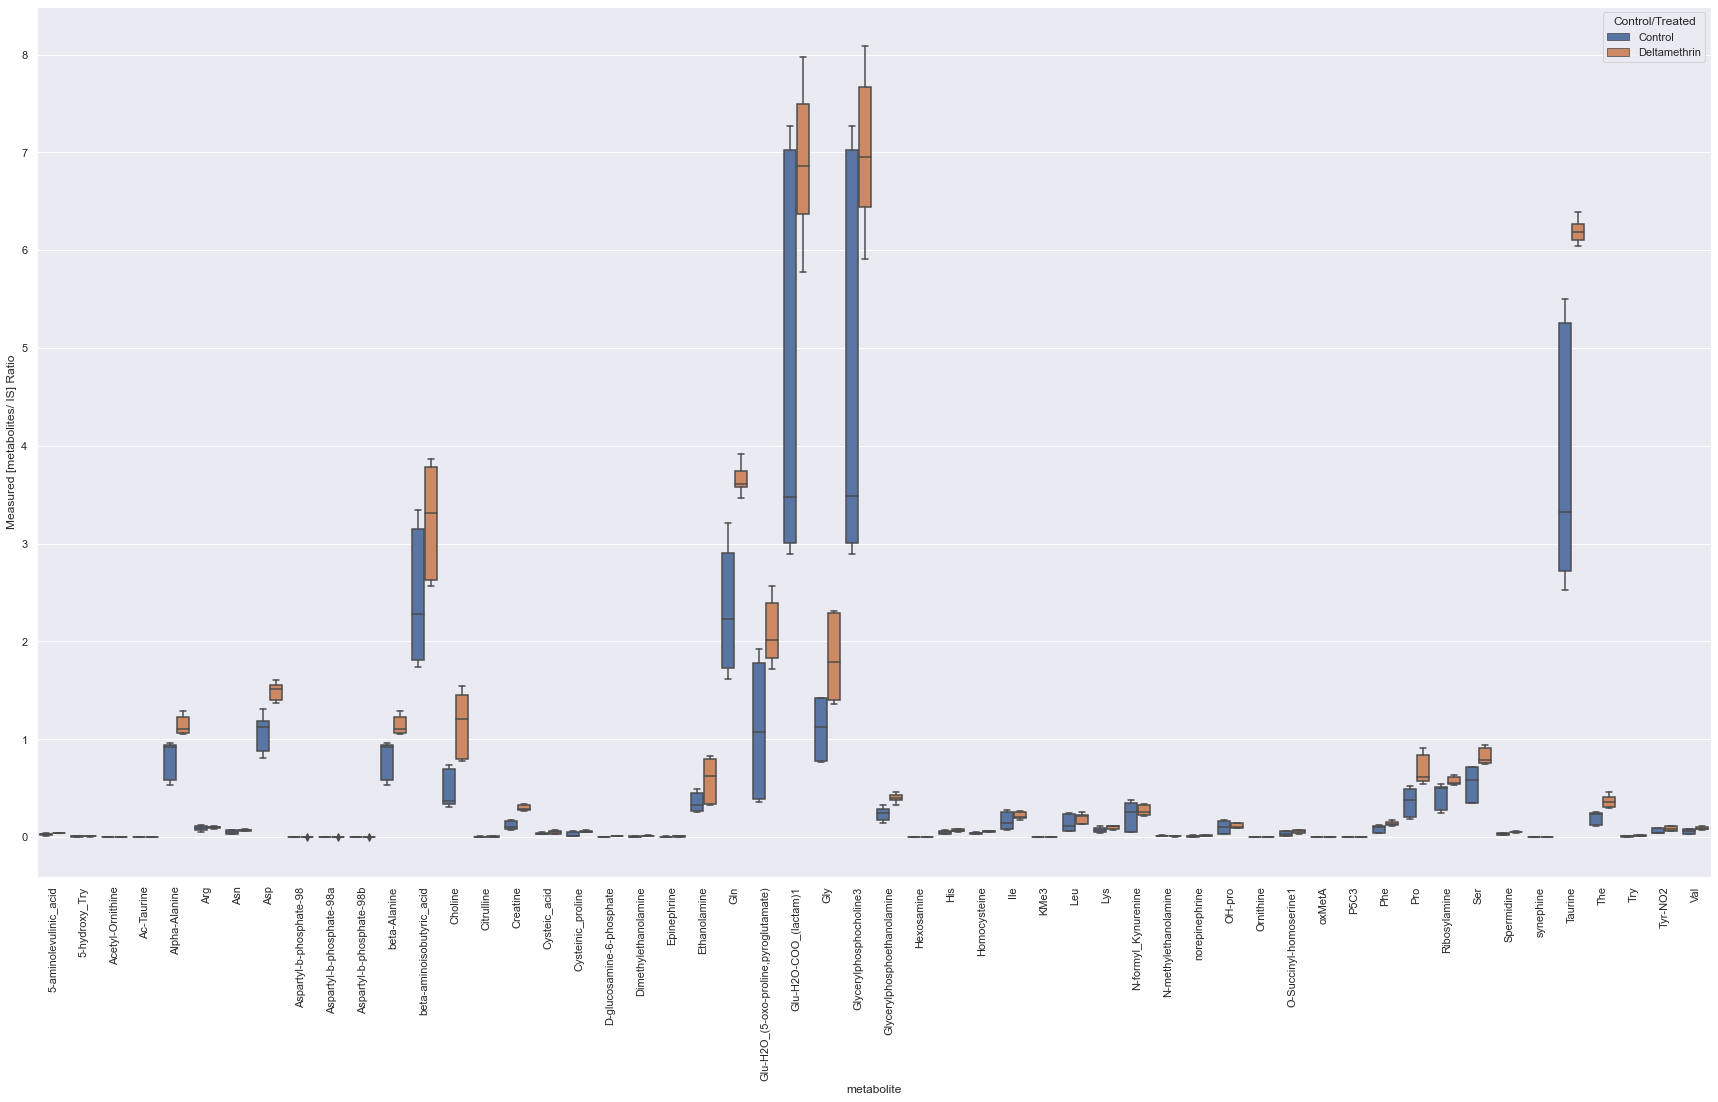

In [128]:
sns.set(rc={"figure.figsize":(30, 16)})
plot = sns.boxplot(x='variable',y='value',hue='Control/Treated',data=data_MIR_melt)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.xlabel("metabolite")
plt.ylabel("Measured [metabolites/ IS] Ratio")

# how to save a figure in svg format.. keep in mind that whe you create a boxplot or other seaborn plots, you have to assign them to a variable (that in this case is the variable plot)
fig100 = plot.get_figure()
fig100.savefig(os.path.join(data_path,'distribuzione-comparazione-trattamento-F30.svg'),format="svg", facecolor='w')

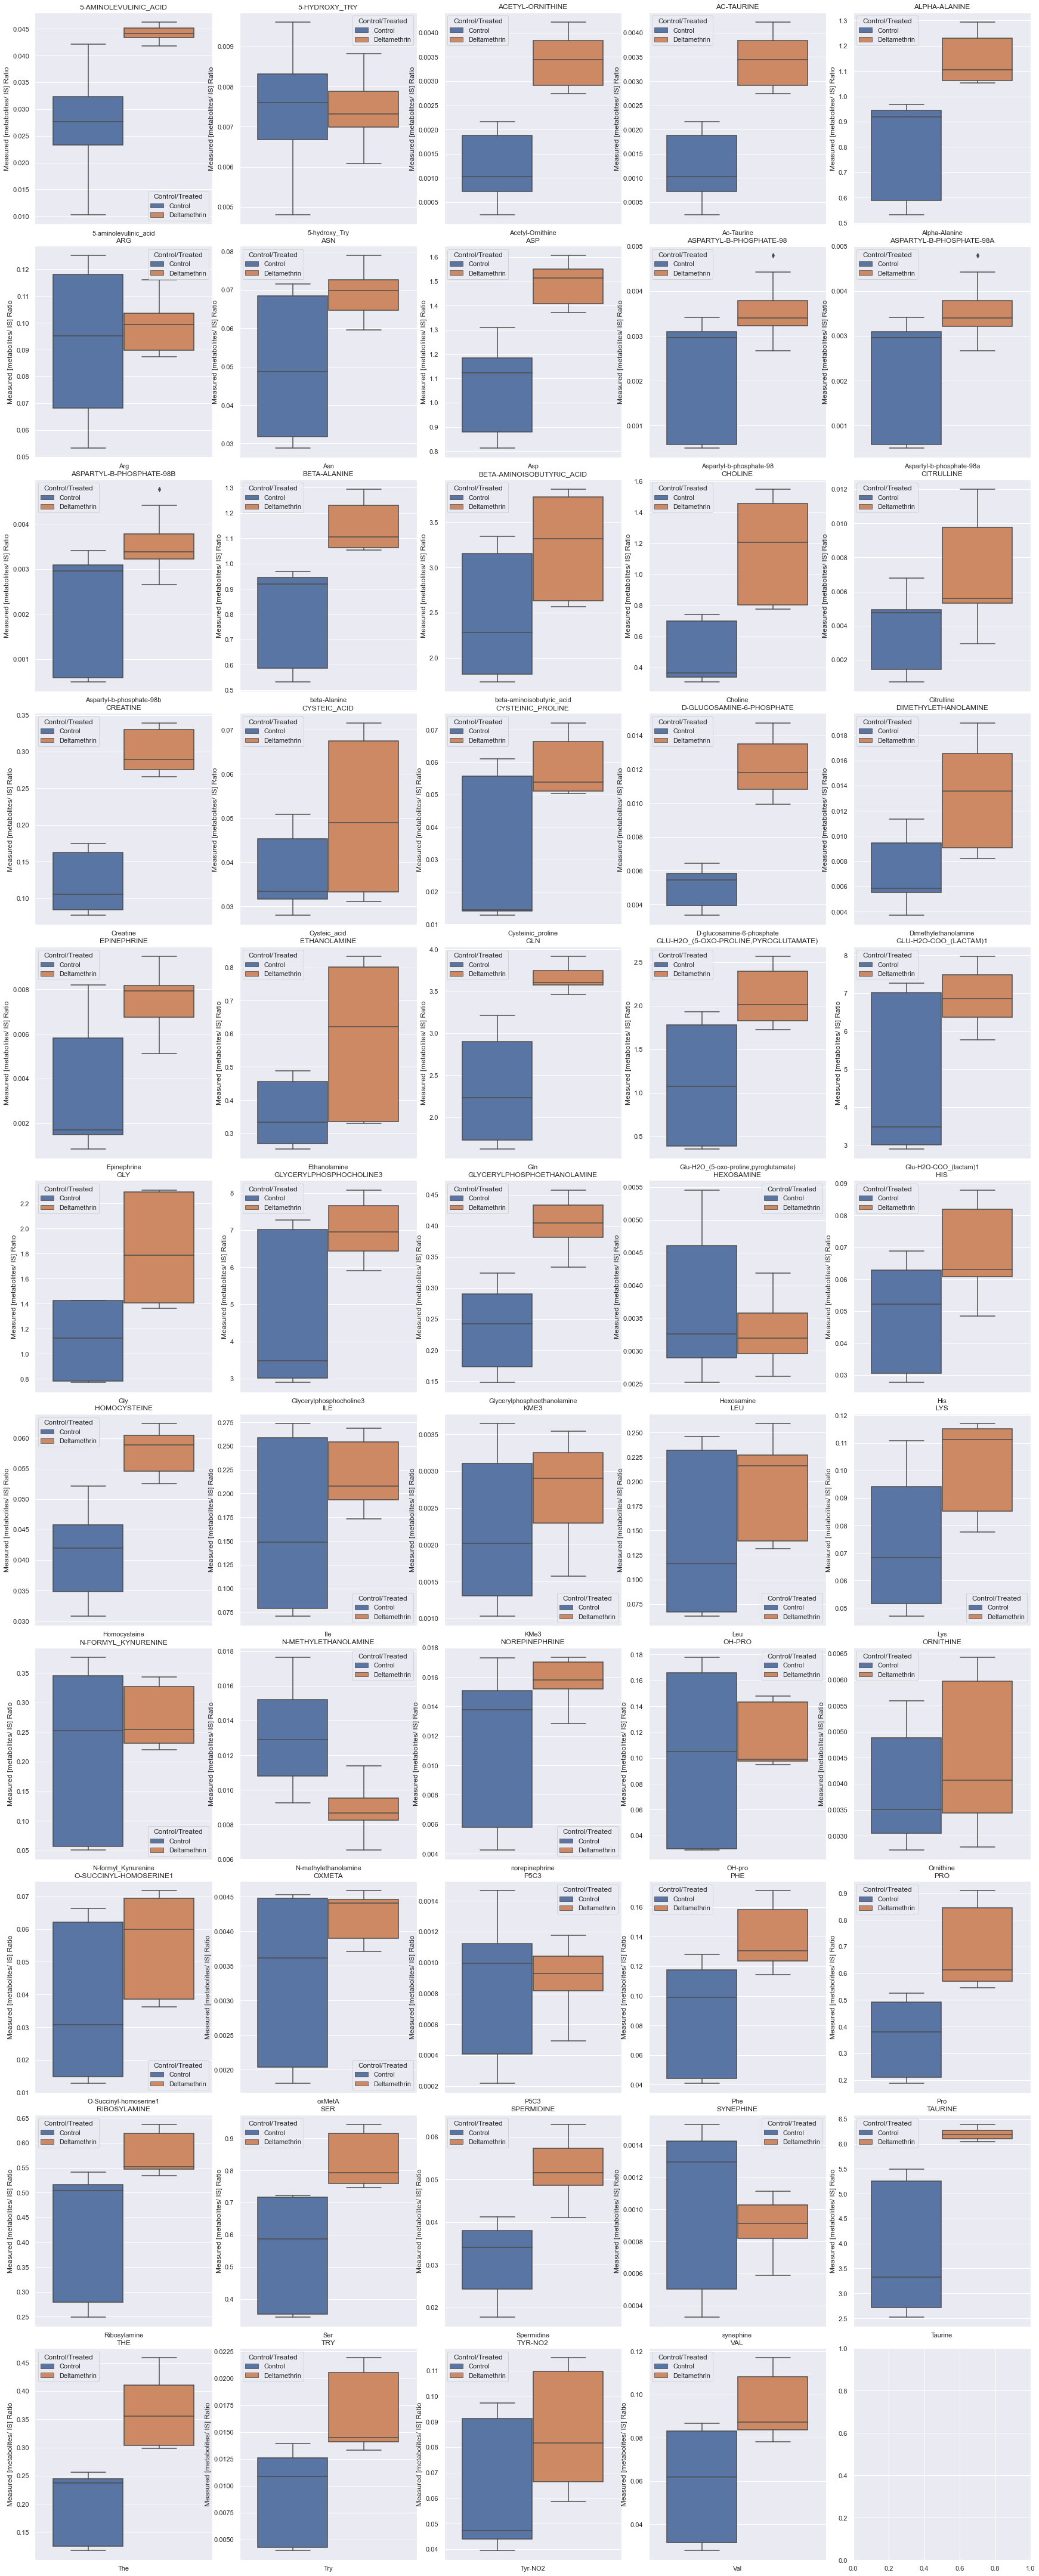

In [129]:
fig, axes = plt.subplots(11, 5, figsize=(24,60))
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

for metabolite, ax in zip(data_MIR.columns, axes.ravel()):
    sns.boxplot(data=data_MIR_melt[data_MIR_melt['variable']==metabolite], x='variable', y='value', hue='Control/Treated', ax=ax).set(xlabel="")
    ax.set_title(metabolite.upper())
    ax.set_xlabel("")
    ax.set_ylabel("Measured [metabolites/ IS] Ratio")
    
fig.savefig(os.path.join(data_path,'boxplot-separati-F30.svg'), format='svg', facecolor='w')
    
plt.show()

## STATISTICS ANALSYSIS

In [130]:
### We make the Shapiro test for normality for each column 

shapiro_normality_test_results = {}
for col in data_MIR.columns:
    shapiro_normality_test_results[col] = stats.shapiro(data_MIR.loc[(slice(None),'Control',slice(None)),col])

In [135]:
for elm in data_MIR.columns:
    print(f'Metabolite: {elm} -- {shapiro_normality_test_results[elm]}')

Metabolite: 5-aminolevulinic_acid -- ShapiroResult(statistic=0.9270340204238892, pvalue=0.34973230957984924)
Metabolite: 5-hydroxy_Try -- ShapiroResult(statistic=0.9401087760925293, pvalue=0.4994823932647705)
Metabolite: Acetyl-Ornithine -- ShapiroResult(statistic=0.9126156568527222, pvalue=0.2304416000843048)
Metabolite: Ac-Taurine -- ShapiroResult(statistic=0.9127479195594788, pvalue=0.2313399761915207)
Metabolite: Alpha-Alanine -- ShapiroResult(statistic=0.7282919883728027, pvalue=0.0016005760990083218)
Metabolite: Arg -- ShapiroResult(statistic=0.912220299243927, pvalue=0.22777703404426575)
Metabolite: Asn -- ShapiroResult(statistic=0.8687314391136169, pvalue=0.06297482550144196)
Metabolite: Asp -- ShapiroResult(statistic=0.884747326374054, pvalue=0.10084648430347443)
Metabolite: Aspartyl-b-phosphate-98 -- ShapiroResult(statistic=0.7176050543785095, pvalue=0.0012518273433670402)
Metabolite: Aspartyl-b-phosphate-98a -- ShapiroResult(statistic=0.7177171111106873, pvalue=0.00125503039

### Histograms

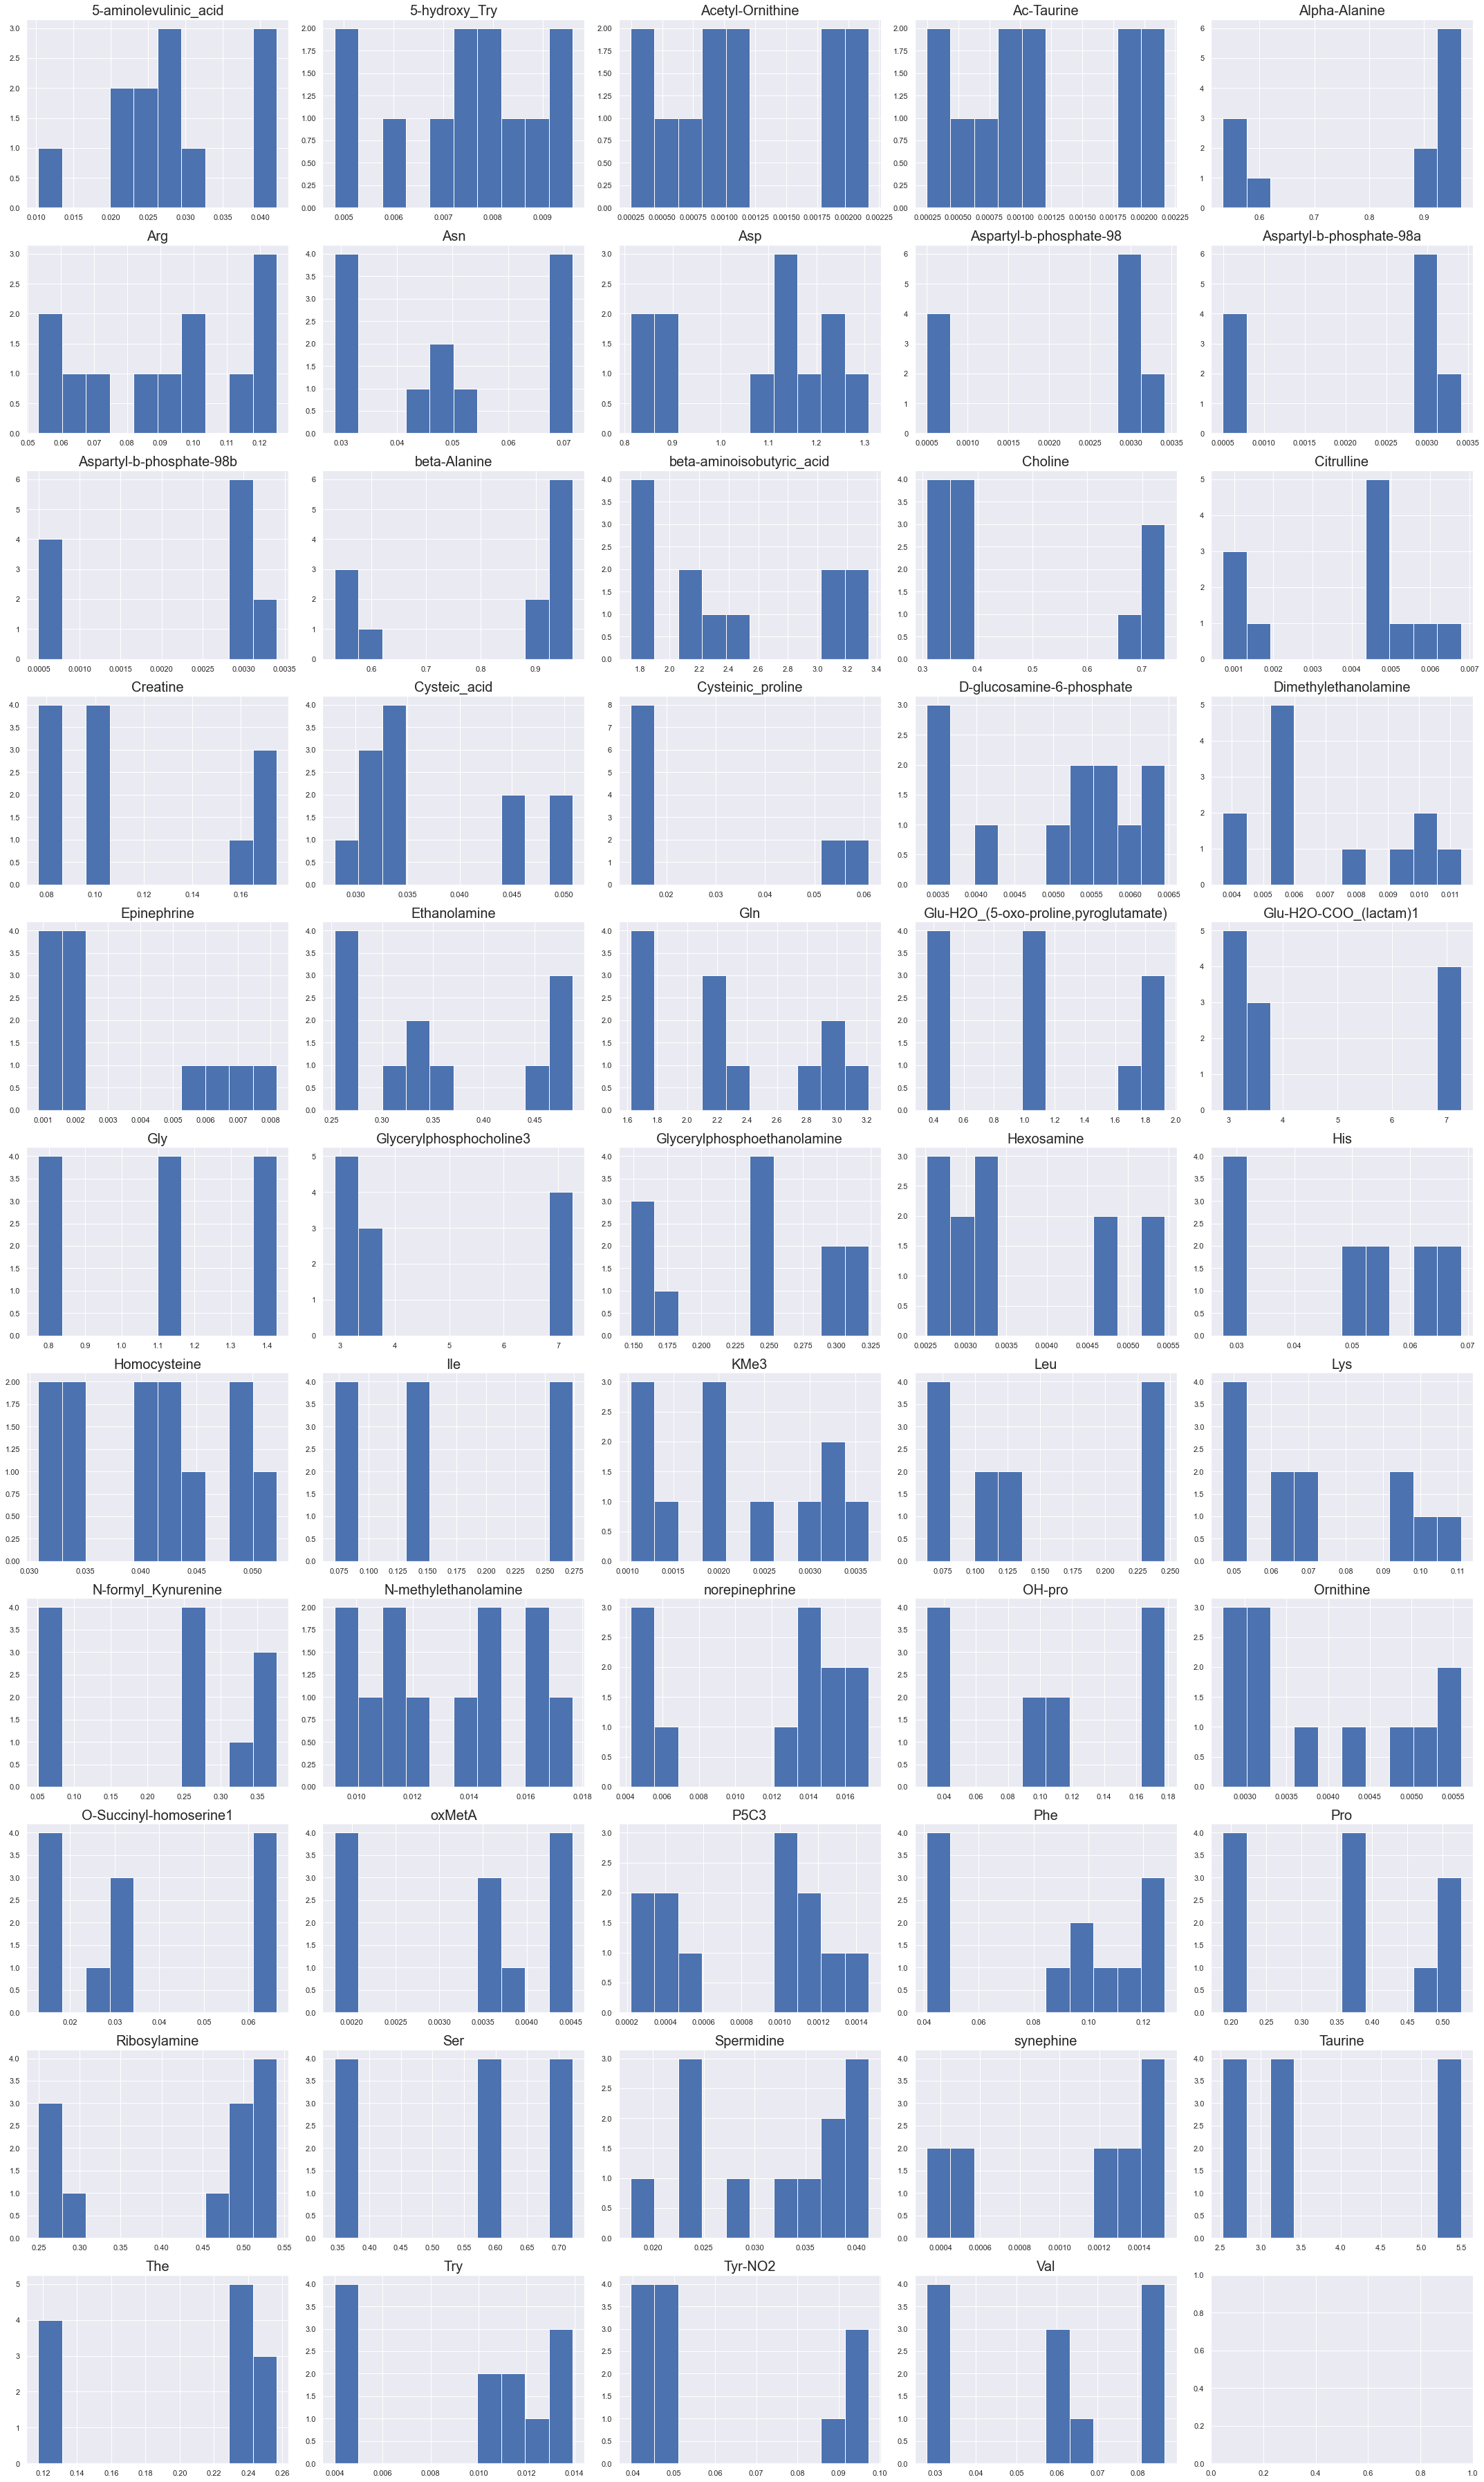

In [137]:
import math
i,j=0,0
PLOTS_PER_ROW = 5
fig, axs = plt.subplots(math.ceil(len(data_MIR.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(30, 50))
for col in data_MIR.columns:
    data_MIR.loc[(slice(None),'Control',slice(None)),col].hist(ax = axs[i,j])
    axs[i][j].set_title(col, fontsize=20)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
fig.tight_layout()

fig.savefigure(os.path.join(data_path,"histograms.svg"), format="svg", facecolor="w")

plt.show()

### QQPLOT

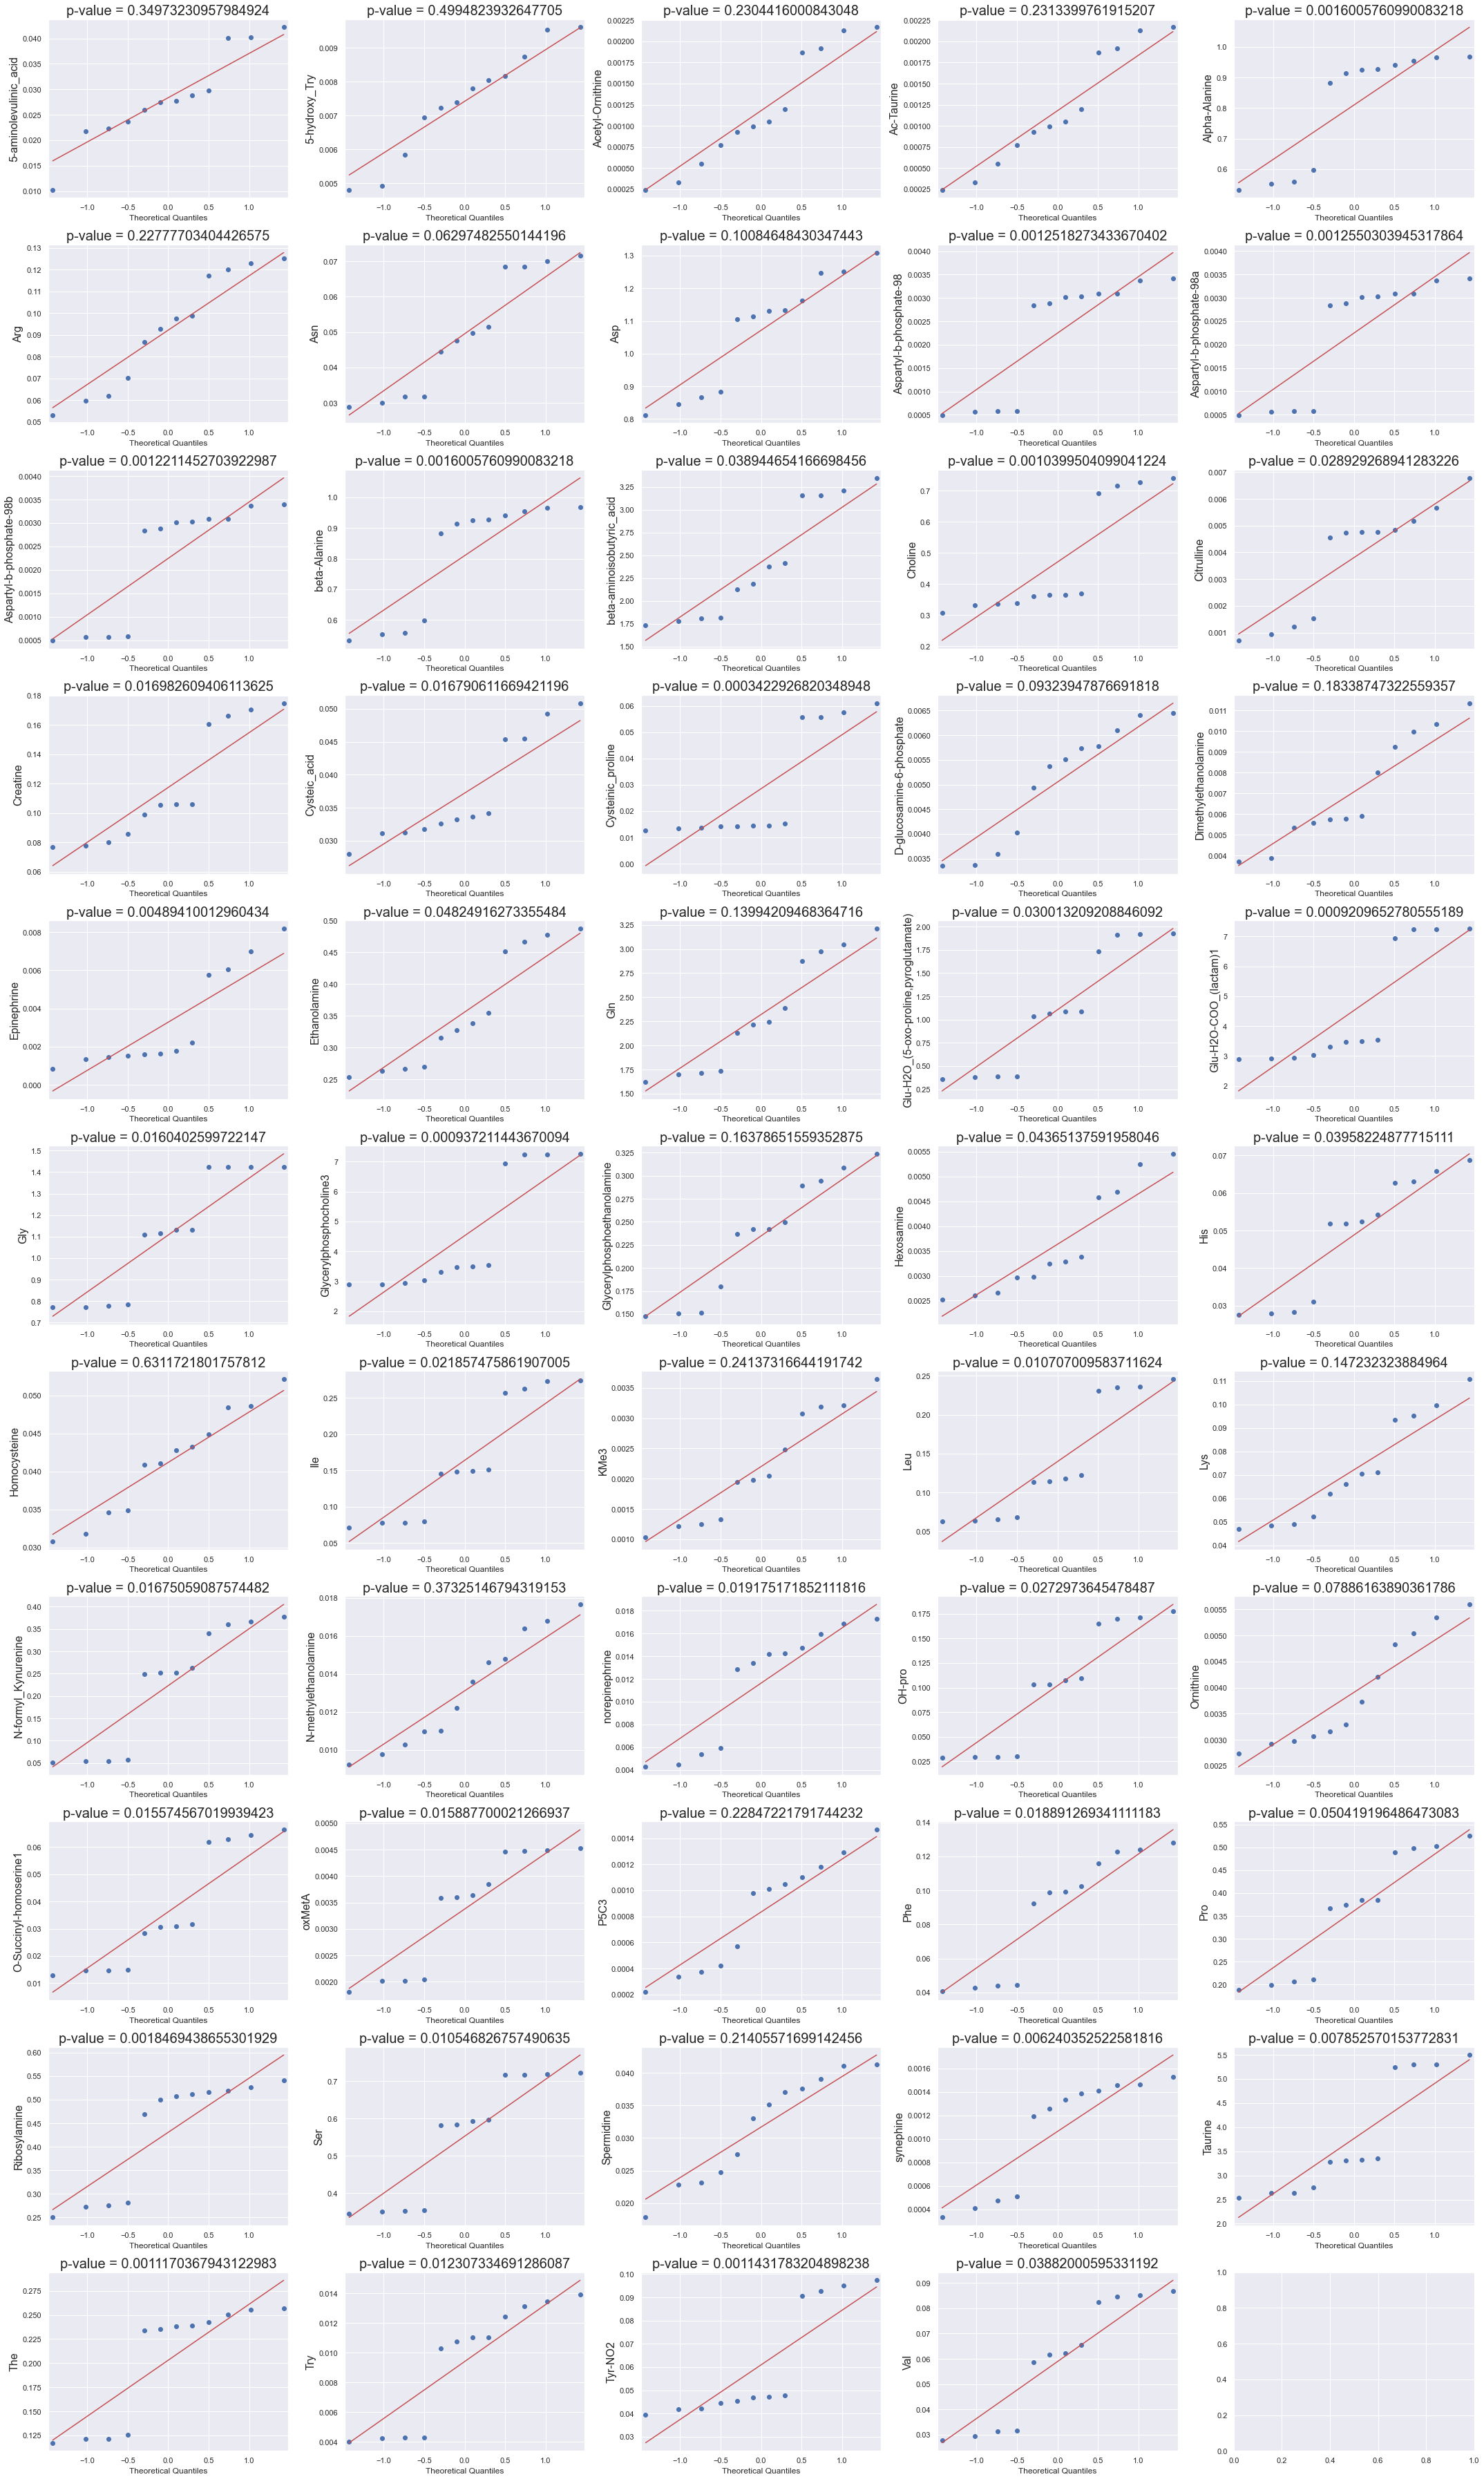

In [138]:
import math
i,j=0,0
PLOTS_PER_ROW = 5
fig, axs = plt.subplots(math.ceil(len(data_MIR.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(30, 50))
for col in data_MIR.columns:
    sm.qqplot(data_MIR.loc[(slice(None),'Control',slice(None)),col], line='s', ax = axs[i, j])
    axs[i][j].set_ylabel(col, fontsize=16)
    axs[i][j].set_title('p-value = ' + str(shapiro_normality_test_results[col].pvalue), fontsize=20)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
fig.tight_layout()

fig.savefigure(os.path.join('qqplot.svg', format='svg', facecolor='w'))

plt.show()

## TTest (but they are not normal so it doesn't make a lot of sense))

In [141]:
ttest_results = {}
for col in data_MIR.columns:
    ttest_results[col] = ttest_ind(data_MIR.loc[(slice(None),'Control',slice(None)),col], data_MIR.loc[(slice(None),'Deltamethrin',slice(None)),col], equal_var=False)   

In [142]:
for elm in data_MIR.columns:
    print(f'Metabolite: {elm} -- {ttest_results[elm]}')

Metabolite: 5-aminolevulinic_acid -- Ttest_indResult(statistic=-5.966479024297366, pvalue=7.878216745006238e-05)
Metabolite: 5-hydroxy_Try -- Ttest_indResult(statistic=-0.06415707478106507, pvalue=0.9495711546339781)
Metabolite: Acetyl-Ornithine -- Ttest_indResult(statistic=-8.96977180988832, pvalue=1.3060016197195126e-08)
Metabolite: Ac-Taurine -- Ttest_indResult(statistic=-8.966416332688215, pvalue=1.3078822113857458e-08)
Metabolite: Alpha-Alanine -- Ttest_indResult(statistic=-5.488700593875073, pvalue=4.604359066327897e-05)
Metabolite: Arg -- Ttest_indResult(statistic=-0.8483268487940282, pvalue=0.410233228451206)
Metabolite: Asn -- Ttest_indResult(statistic=-3.8078036039775274, pvalue=0.0020445393053608613)
Metabolite: Asp -- Ttest_indResult(statistic=-7.547381460465686, pvalue=1.2453592935984976e-06)
Metabolite: Aspartyl-b-phosphate-98 -- Ttest_indResult(statistic=-3.2812844038589124, pvalue=0.004855794717166598)
Metabolite: Aspartyl-b-phosphate-98a -- Ttest_indResult(statistic=-3

### ANOVA

In [143]:
data_MIR_anova = pd.melt(data_MIR.reset_index(), id_vars=['Subject','Control/Treated'],value_vars=list_columns)
data_MIR_anova.rename(columns={'Control/Treated':'Treated'}, inplace=True)
enc = OrdinalEncoder()
enc.fit(data_MIR_anova[["Subject","Treated"]])
data_MIR_anova[["Subject","Treated"]] = enc.transform(data_MIR_anova[["Subject","Treated"]])
data_MIR_anova.head(5)

,Subject,Treated,variable,value
0,3.0,0.0,5-aminolevulinic_acid,0.040117
1,3.0,0.0,5-aminolevulinic_acid,0.027517
2,3.0,0.0,5-aminolevulinic_acid,0.040215
3,3.0,0.0,5-aminolevulinic_acid,0.042181
4,4.0,0.0,5-aminolevulinic_acid,0.023696


In [144]:
# Inter
model = ols('value ~ C(Subject) + C(Treated)', data=data_MIR_anova.iloc[:24,:]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Subject),0.001035,5.0,13.819078,1.246357e-05
C(Treated),0.001816,1.0,121.209326,1.993452e-09
Residual,0.000270,18.0,NaN,NaN


In [145]:
model = ols('value ~ C(Treated)', data=data_MIR_anova.iloc[:24,:]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Treated),0.001500,1.0,35.598872,0.000005
Residual,0.000927,22.0,NaN,NaN


### Wilcoxon Test

In [151]:
metabolite = data_MIR.columns

for t in metabolite:
    a = data_MIR_melt[(data_MIR_melt['Control/Treated'] == 'Control') & (data_MIR_melt['variable']==t)]['value']
    b = data_MIR_melt[(data_MIR_melt['Control/Treated'] == 'Deltamethrin') & (data_MIR_melt['variable']==t)]['value']

    a = a.dropna()
    b = b.dropna()

    print(f'Metabolite: {t}. P-value: {ranksums(a,b).pvalue:.2e}')

Metabolite: 5-aminolevulinic_acid. P-value: 4.15e-05
Metabolite: 5-hydroxy_Try. P-value: 8.62e-01
Metabolite: Acetyl-Ornithine. P-value: 3.23e-05
Metabolite: Ac-Taurine. P-value: 3.23e-05
Metabolite: Alpha-Alanine. P-value: 3.23e-05
Metabolite: Arg. P-value: 6.44e-01
Metabolite: Asn. P-value: 3.89e-03
Metabolite: Asp. P-value: 3.23e-05
Metabolite: Aspartyl-b-phosphate-98. P-value: 1.82e-03
Metabolite: Aspartyl-b-phosphate-98a. P-value: 1.82e-03
Metabolite: Aspartyl-b-phosphate-98b. P-value: 1.82e-03
Metabolite: beta-Alanine. P-value: 3.23e-05
Metabolite: beta-aminoisobutyric_acid. P-value: 2.21e-03
Metabolite: Choline. P-value: 3.23e-05
Metabolite: Citrulline. P-value: 3.89e-03
Metabolite: Creatine. P-value: 3.23e-05
Metabolite: Cysteic_acid. P-value: 5.67e-02
Metabolite: Cysteinic_proline. P-value: 2.09e-02
Metabolite: D-glucosamine-6-phosphate. P-value: 3.23e-05
Metabolite: Dimethylethanolamine. P-value: 1.22e-03
Metabolite: Epinephrine. P-value: 1.50e-03
Metabolite: Ethanolamine. P-